In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py

%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

dir_tfCube: /Users/hhg/Research/kinematic_lensing/repo/KLens


In [2]:
data_info = gen_dataInfo_from_tfCube(vcirc=200., 
                                     redshift=0.2, 
                                     sini=0.5, 
                                     slitAngles=[0.], 
                                     norm=0.,
                                     g1=0.0,
                                     g2=0.05)

redshift : 0.2
g1 : 0.0
half_light_radius : 0.5
vcirc : 200.0
sini : 0.5
slitWidth : 0.02
slitAngles : [0.0]


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.443296194076538 (sec)
total getSlitSpectra time: 1.2348911762237549 (sec)


In [3]:
data_info.keys()

dict_keys(['ModelCube', 'ObsCube', 'image', 'image_variance', 'data', 'grid_lambda', 'grid_pos', 'grid_Image', 'par_fid', 'lambda_emit'])

In [4]:
data_info['ModelCube'].shape

(256, 256, 160)

In [5]:
data_info['image']

array([[ 2.73281366e-05,  2.05526914e-04,  5.36565385e-05, ...,
        -1.78140777e-04, -3.60927224e-05, -3.19374521e-05],
       [-3.88753455e-04, -3.88832850e-04, -2.55383144e-04, ...,
         1.16354735e-04, -1.59632196e-04,  6.14452350e-04],
       [ 1.49265015e-05, -9.56391814e-05, -1.58987401e-04, ...,
        -7.61316333e-05,  1.28015861e-04,  2.15223408e-05],
       ...,
       [-9.51689144e-05, -1.44022066e-04, -1.47041355e-04, ...,
         3.22982698e-04,  3.29751929e-04, -4.35708294e-04],
       [ 5.66309200e-06, -8.29402270e-05, -1.28414995e-05, ...,
         1.97891961e-04, -1.56030277e-04, -3.27826165e-05],
       [ 7.43267447e-05, -1.31395689e-04, -2.08168785e-04, ...,
         1.73953638e-04,  5.22735245e-05,  8.41902292e-05]], dtype=float32)

In [6]:
GaussFit = GaussFit_spec2D(data_info)

In [7]:
fitted_peakLambda, fitted_amp, fitted_sigma = GaussFit.gaussFit_spec2D(data=GaussFit.data)

model = GaussFit.model_spec2D(fitted_peakLambda,fitted_amp,fitted_sigma)

time cost in gaussFit_spec2D: 0.19948959350585938 (secs)


In [8]:
data = GaussFit.data

In [9]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/RotationCurveFit.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

RotFit = RotationCurveFit(data_info, active_par_key=['vscale', 'r_0', 'vcirc', 'v_0'])

time cost in gaussFit_spec2D: 0.17440414428710938 (secs)


In [10]:
params_rot = RotFit.optFit_rotation_curve(fitted_peakLambda=RotFit.gaussfit_peakLambda)
params_rot

{'vscale': 0.4982294435769087,
 'r_0': -0.0080021047698016,
 'vcirc': 200.0186655194502,
 'v_0': 0.011897868869072722,
 'redshift': 0.19999999987108666,
 'sini': 0.4999999999000029}

In [11]:
lambda_min = np.min(GaussFit.grid_lambda)  ; lambda_MAX = np.max(GaussFit.grid_lambda)
x_min = np.min(GaussFit.grid_pos)          ; x_MAX = np.max(GaussFit.grid_pos)

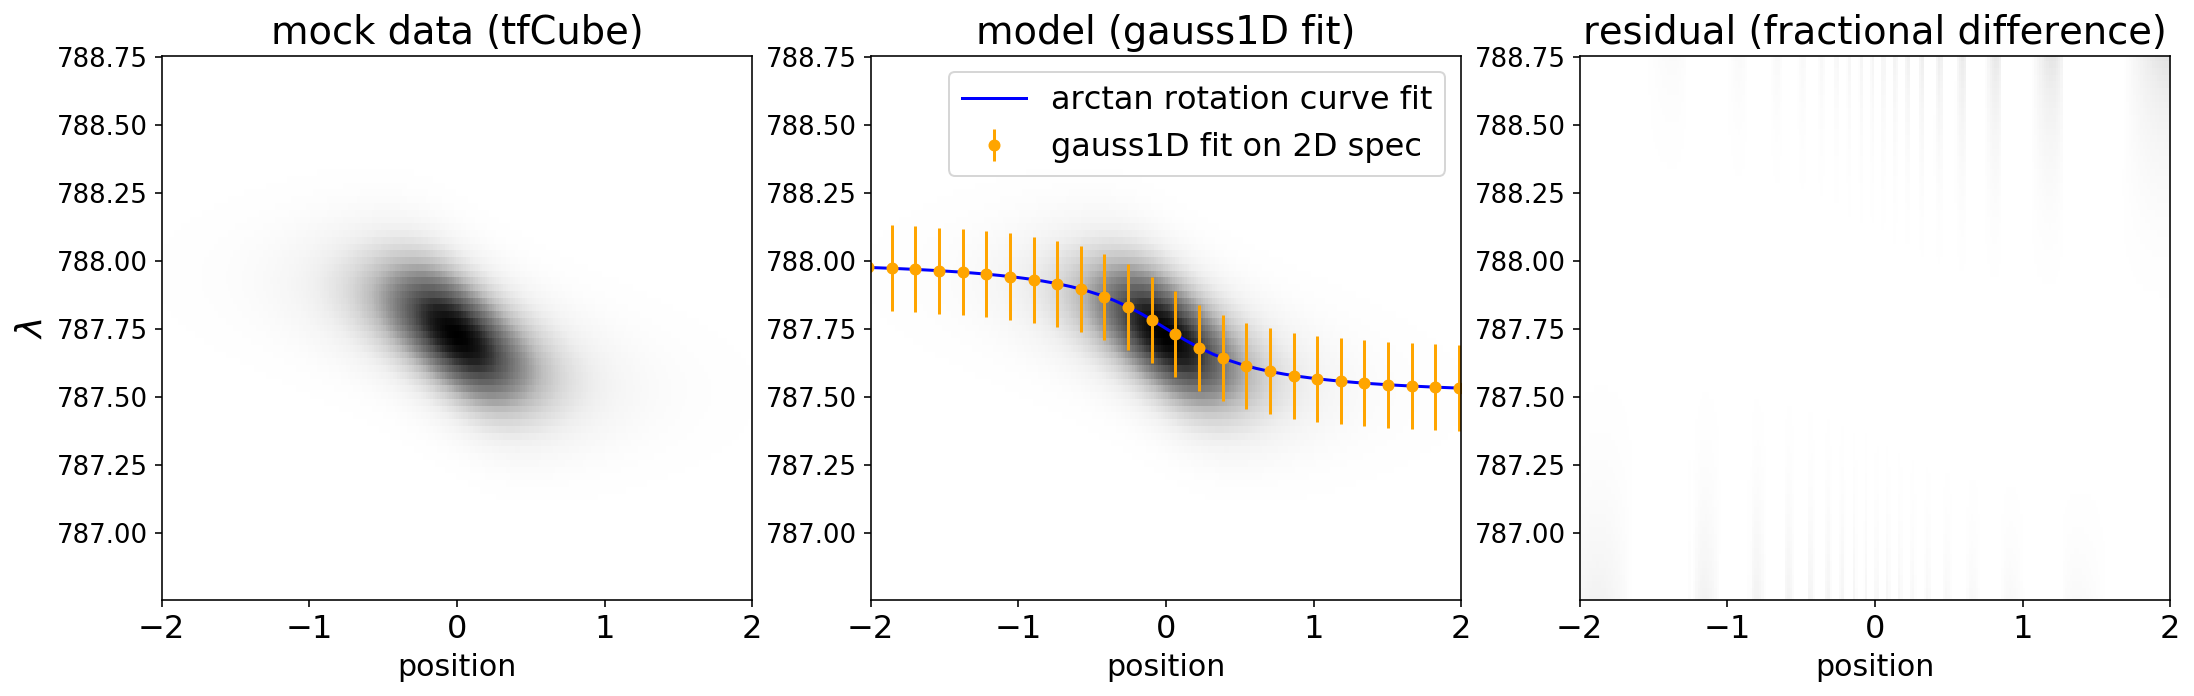

In [12]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
plt.rc('font',size=16)

ax[0].imshow(data.T ,extent=[x_min, x_MAX, lambda_min, lambda_MAX ]       , aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model.T,extent=[x_min, x_MAX, lambda_min, lambda_MAX ]       , aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data.T-model.T)/data.T,extent=[x_min, x_MAX, lambda_min, lambda_MAX ], aspect='auto',cmap='Greys',vmin=0)

#ax[1].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak (exact)')
#ax[1].plot(GaussFit.fitted_rot_lambdaObs[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot lambdaObs based on peakLambda')
#ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')
ax[1].errorbar(np.flip(GaussFit.grid_pos)[3::10], fitted_peakLambda[3::10], fitted_sigma[3::10] ,color='orange', marker='o', markersize=5,ls='none',label='gauss1D fit on 2D spec')
ax[1].plot(np.flip(GaussFit.grid_pos)[5::6],RotFit.fitted_rot_lambdaObs[5::6],color='b',ls='-',label='arctan rotation curve fit')



#ax[2].plot(peak_info['peak_loc'][::6],np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(GaussFit.approxFit_rot_lambda_peak[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')

vcen = data_info['lambda_emit']*(1.+data_info['par_fid']['redshift'])

for j in range(ncol):
#    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
#    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
#    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
#    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    
    ax[j].set_ylim(vcen-1.0,vcen+1.0)
    ax[j].set_xlim(-2,2)
    ax[j].set_xlabel('position', fontsize=15)
    ax[j].tick_params(axis='x', labelsize=16)
    ax[j].tick_params(axis='y', labelsize=13)

ax[0].set_ylabel(r'$\lambda$', fontsize=18)    
ax[0].set_title('mock data (tfCube)')
ax[1].set_title('model (gauss1D fit)')
ax[2].set_title('residual (fractional difference)')

#ax[1].legend(loc=(2.3,0.75),prop={'size':16})
ax[1].legend(loc="best",prop={'size':16})

plt.show()

In [13]:
fitted_sigma

array([-0.15794467, -0.15796532, -0.15798569, -0.15800576, -0.15802552,
       -0.15804493, -0.15806397, -0.15808262, -0.15810086, -0.15811864,
       -0.15813595, -0.15815274, -0.158169  , -0.15818468, -0.15819974,
       -0.15821415, -0.15822787, -0.15824086, -0.15825306, -0.15826444,
       -0.15827495, -0.15828452, -0.15829311, -0.15830067, -0.15830712,
       -0.1583124 , -0.15831646, -0.15831921, -0.15832058, -0.1583205 ,
       -0.15831888, -0.15831563, -0.15831067, -0.15830389, -0.15829521,
       -0.1582845 , -0.15827165, -0.15825656, -0.15823909, -0.15821912,
       -0.1581965 , -0.15817108, -0.15814273, -0.15811127, -0.15807654,
       -0.15803835, -0.15799652, -0.15795086, -0.15790115, -0.15784717,
       -0.15786547, -0.15792102, -0.1579742 , -0.15802478, -0.15807252,
       -0.15811716, -0.15815841, -0.15819597, -0.15822952, -0.15825871,
       -0.15828317, -0.15830251, -0.15831631, -0.15832412, -0.15832545,
       -0.15831979, -0.1583066 , -0.1582853 , -0.15825526, -0.15

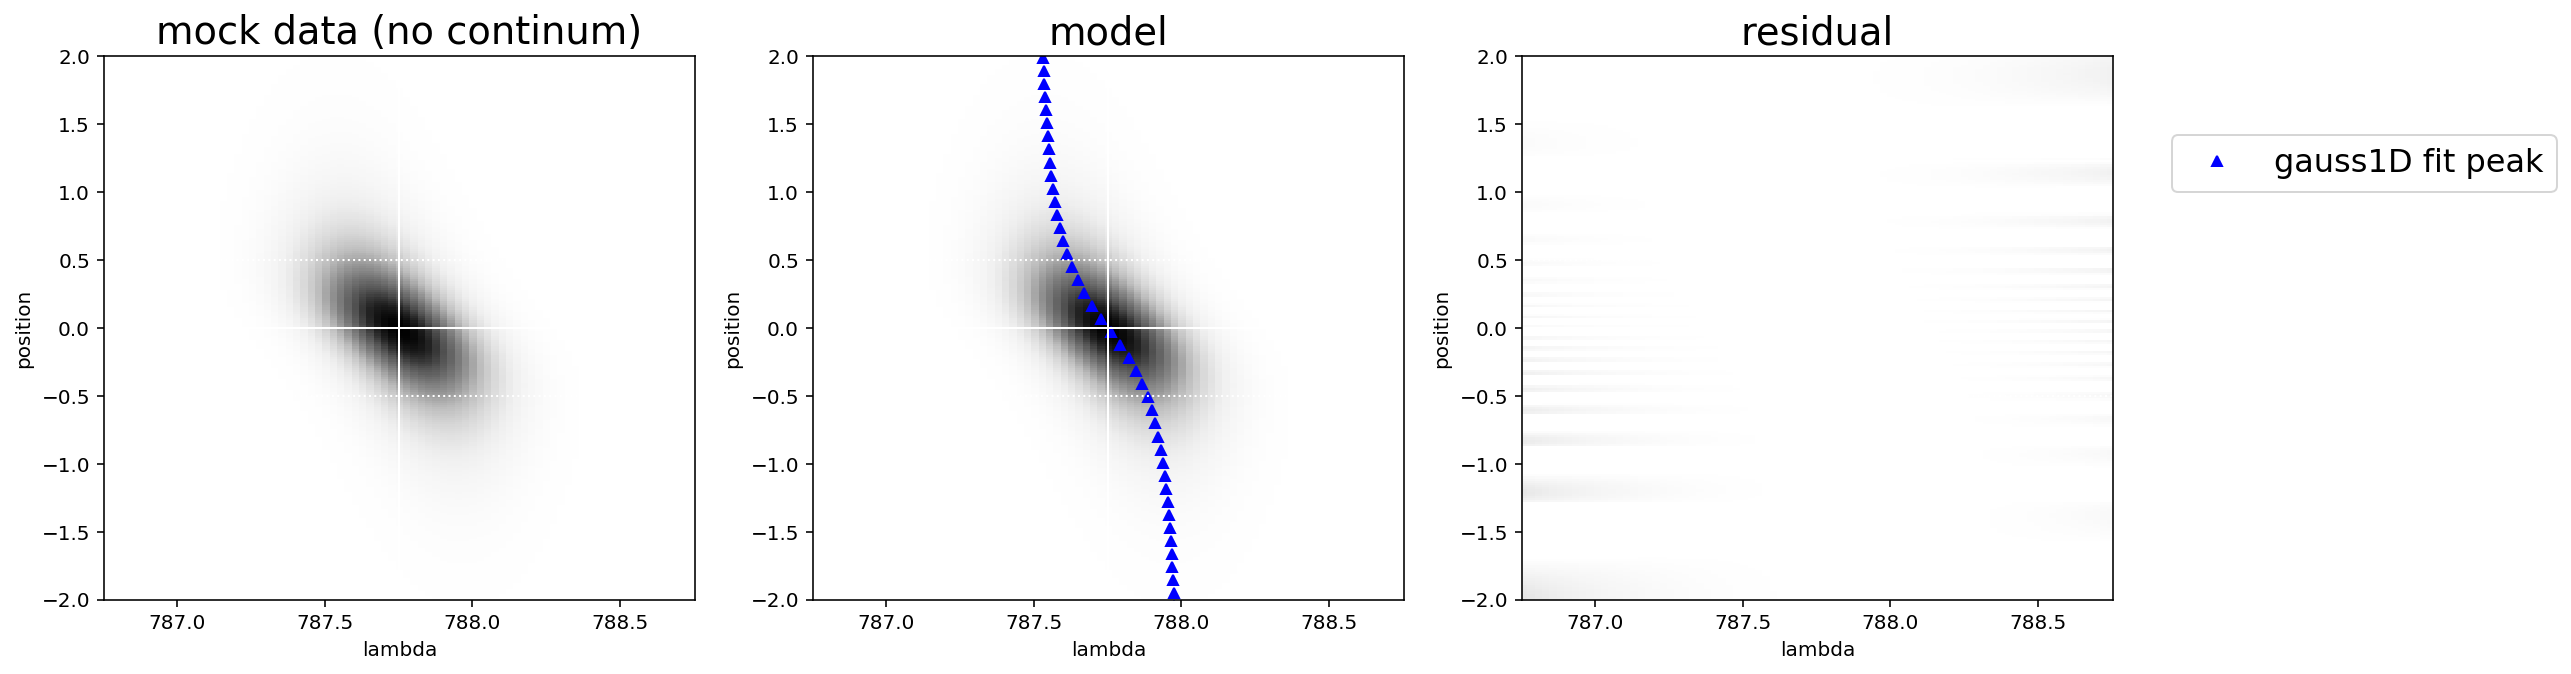

In [14]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
plt.rc('font',size=16)

ax[0].imshow(data ,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data-model)/data,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)

#ax[1].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak (exact)')
ax[1].plot(fitted_peakLambda[3::6]            ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none',label='gauss1D fit peak')
#ax[1].plot(GaussFit.fitted_rot_lambdaObs[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot lambdaObs based on peakLambda')
#ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')


#ax[2].plot(peak_info['peak_loc'][::6],np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(GaussFit.approxFit_rot_lambda_peak[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')


vcen = data_info['lambda_emit']*(1.+data_info['par_fid']['redshift'])

for j in range(ncol):
    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    
    ax[j].set_xlim(vcen-1.0,vcen+1.0)
    ax[j].set_ylim(-2,2)
    ax[j].set_xlabel('lambda')
    ax[j].set_ylabel('position')
    
ax[0].set_title('mock data (no continum)')
ax[1].set_title('model')
ax[2].set_title('residual')

ax[1].legend(loc=(2.3,0.75),prop={'size':16})

plt.show()

NameError: name 'fit_tool' is not defined

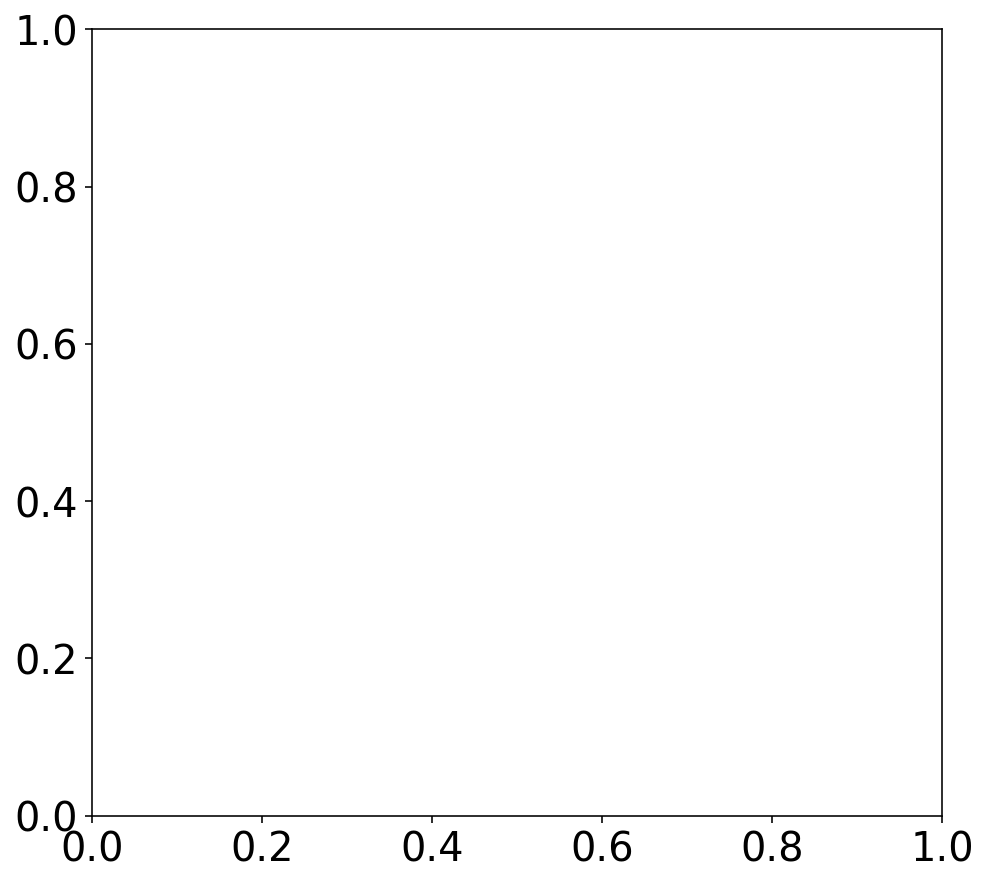

In [15]:
fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.11,0.82,0.84])

ax1.plot(fit_tool.grid_pos,fid_rot_v_peak-v_sys0,label='fiducial',color='lightblue')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='image peak',color='red')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='gauss1D bestfit peak',color='blue',ls="-.")
ax1.plot(fit_tool.grid_pos,fit_tool.approxFit_rot_v_peak-v_sys0,label='bestfit rot curve',color='orange',lw=2)


ax1.set_xlabel('position')
ax1.set_ylabel('velocity')

ax1.legend(loc='best',prop={'size':18})

In [ ]:
%matplotlib inline
plt.imshow(data_info['data'],cmap=plt.cm.Greys,origin="lower")